In [12]:
#1
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
%matplotlib inline


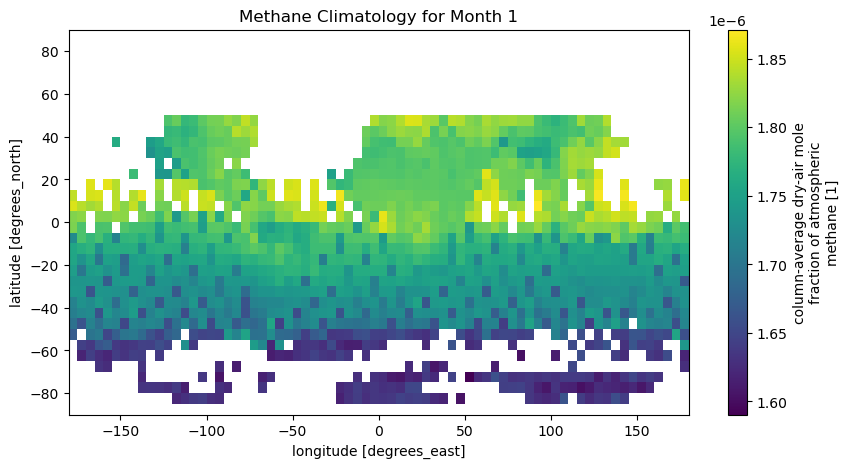

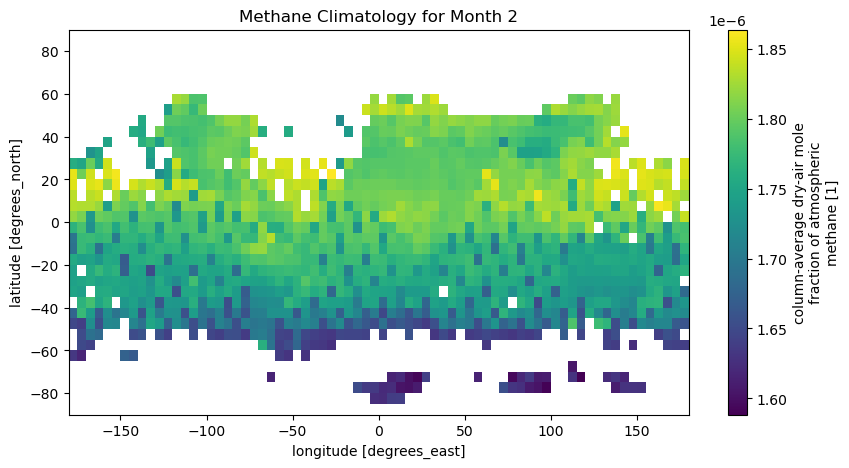

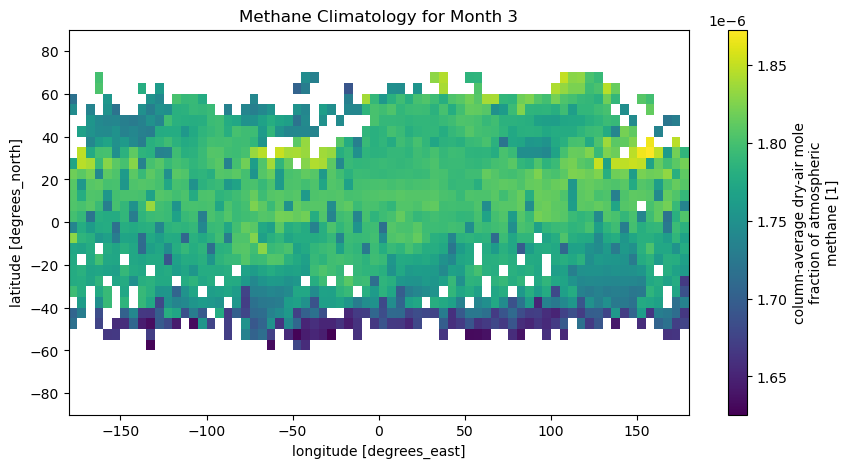

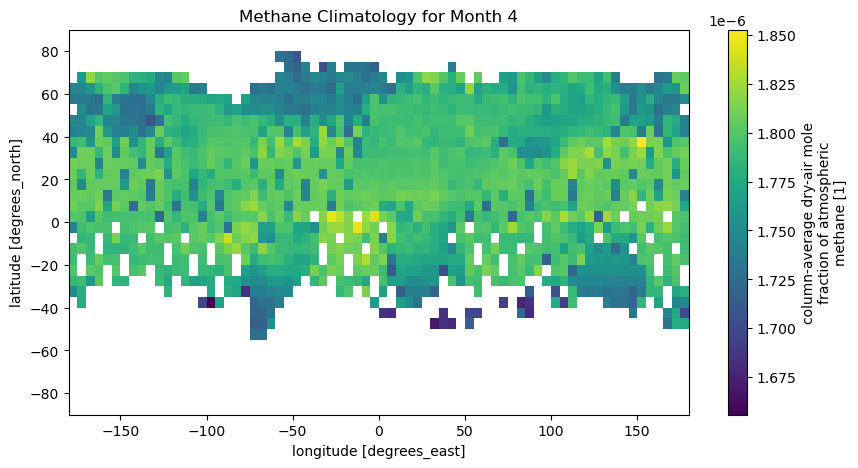

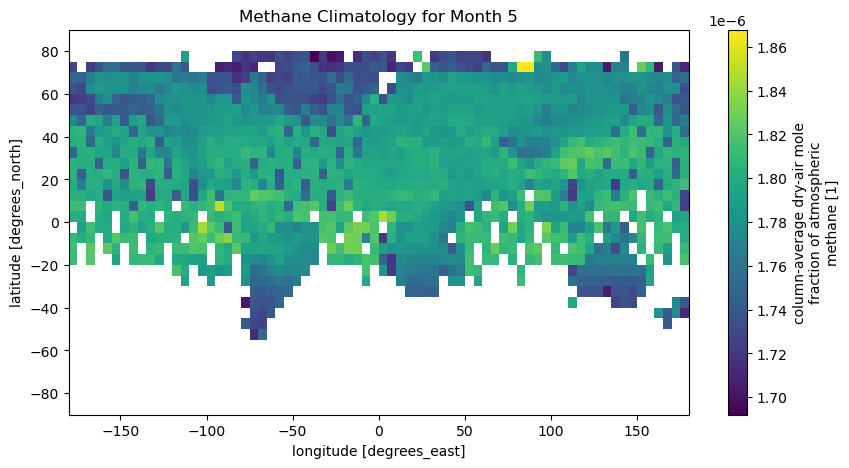

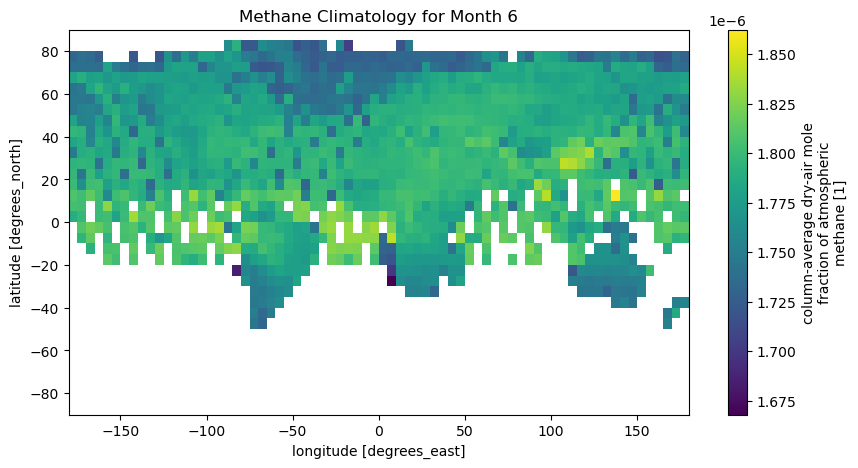

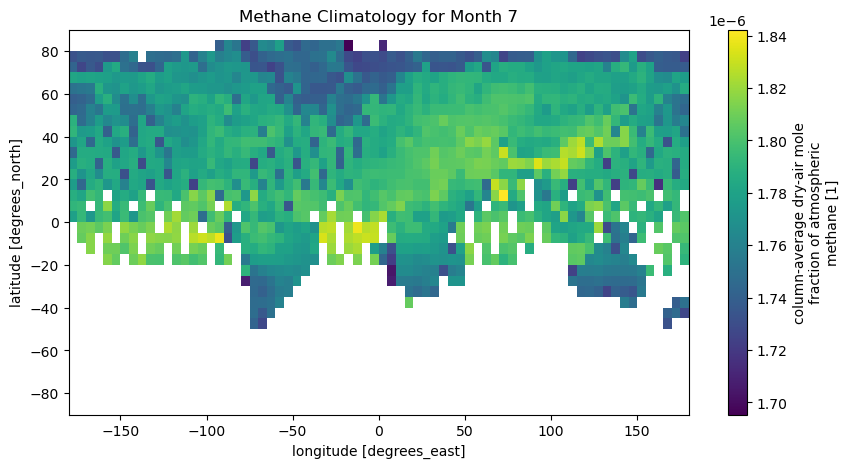

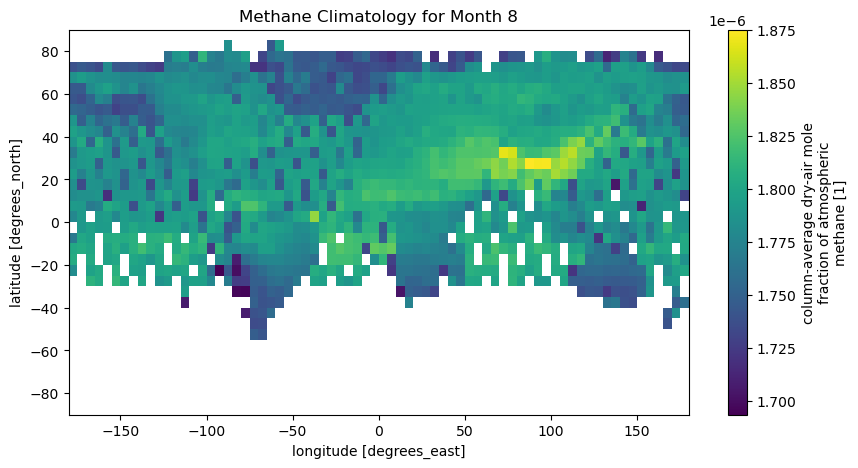

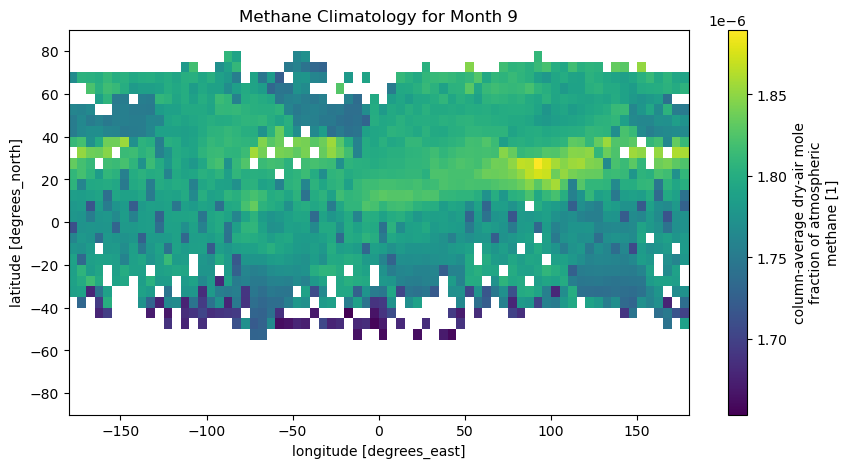

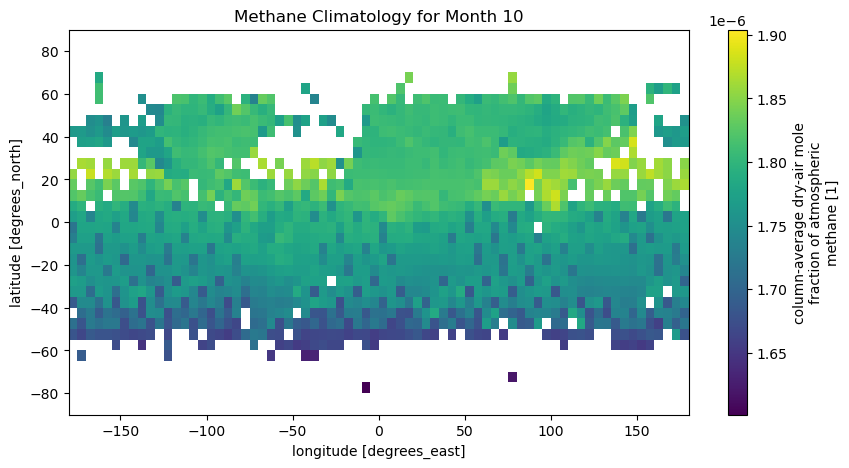

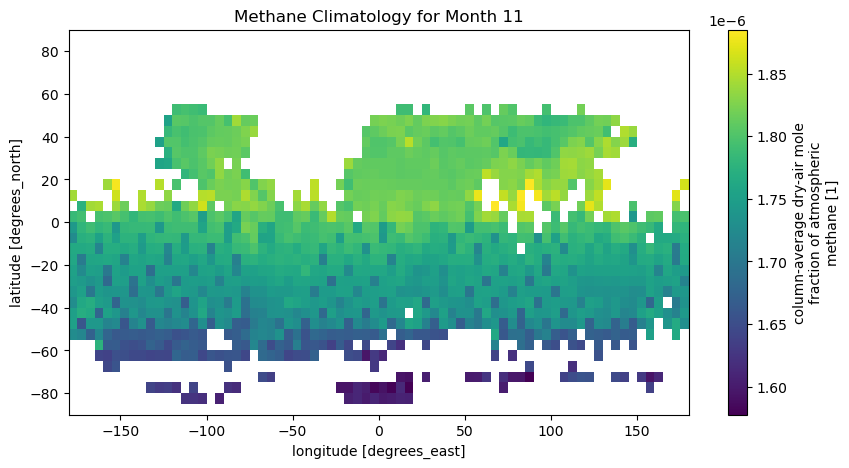

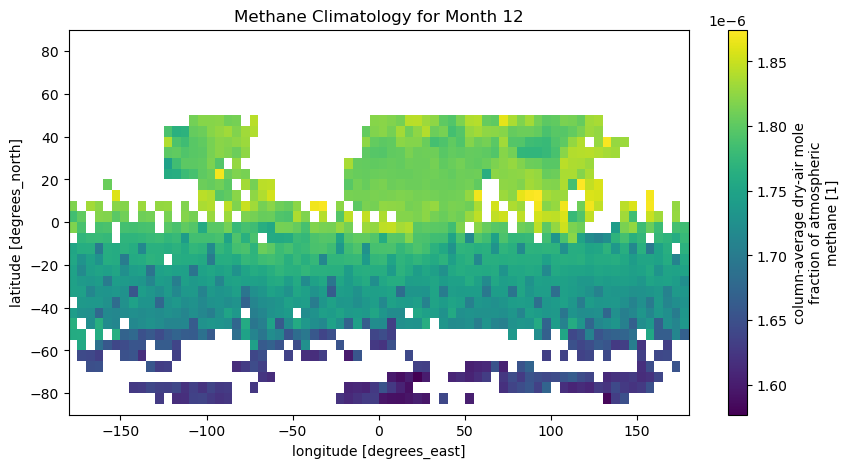

In [243]:
#1.1
ds = xr.open_dataset(r'E:\0_plus_1\home work\python\homework3\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc')

#计算月平均和气候学
#.groupby('time.month')：这是一个分组操作，它按照时间维度上的月份对数据进行分组。这意味着所有相同月份的甲烷水平数据将被聚集在一起。
#.mean('time')：在这个分组之后，计算每个组（即每个月）的平均值。这里的'time'指的是时间维度，表示对每个时间点的甲烷水平取平均值，从而得到每个月的平均甲烷水平。
monthly_climatology = ds['xch4'].groupby('time.month').mean('time')

#绘图
for month in range(1, 13):
    plt.figure(figsize=(10, 5))
    monthly_climatology.sel(month=month).plot()#.sel() 方法选择特定月份的数据
    plt.title(f'Methane Climatology for Month {month}')
    plt.show()
    
    


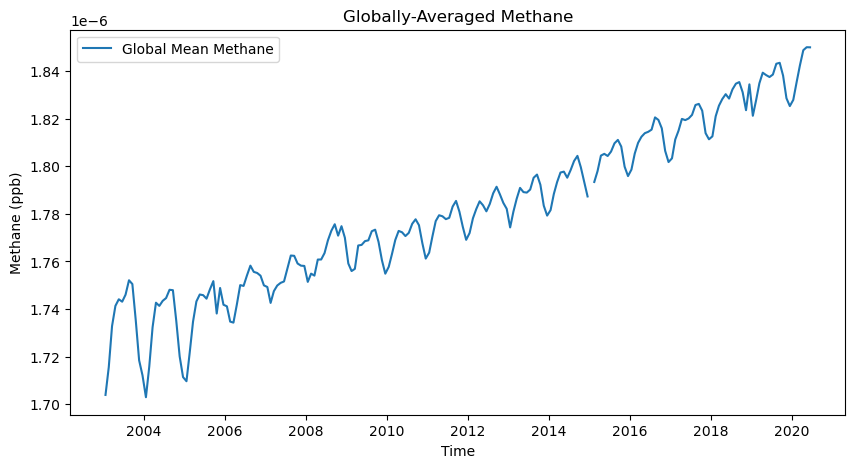

In [18]:
#1.2
#计算全球平均
global_mean = ds['xch4'].mean(dim=['lat', 'lon'])#.mean(dim=['lat', 'lon'])：对每个时间点上所有纬度和经度位置的甲烷值进行平均，从而得到每个时间点的全球平均甲烷水平。

# 绘制时间序列图
plt.figure(figsize=(10, 5))
plt.plot(global_mean.time, global_mean.values, label='Global Mean Methane')
plt.xlabel('Time')
plt.ylabel('Methane (ppb)')
plt.title('Globally-Averaged Methane')
plt.legend()
plt.show()

描述：全球甲烷气体逐年上升，说明越来越多的化学燃烧污染了空气，导致全球气候变暖速度加剧。

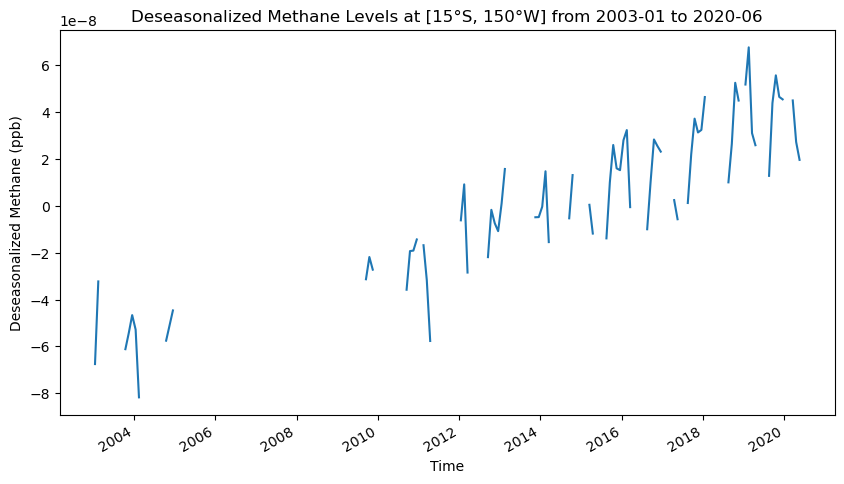

In [245]:
#1.3
#选定位置
methane_data = ds['xch4'].sel(lat=-15, lon=150, method='nearest')
# 计算季节循环:使用一个月的时间分辨率来计算季节循环
monthly_climatology = methane_data.groupby('time.month').mean(dim=['time'])

# 去季节化:从原始数据中减去季节循环，得到去季节化的甲烷水平
deseasonalized_methane = methane_data.groupby('time.month') - monthly_climatology

# 绘制时间序列图
plt.figure(figsize=(10, 5))
deseasonalized_methane.plot()
plt.title('Deseasonalized Methane Levels at [15°S, 150°W] from 2003-01 to 2020-06')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Methane (ppb)')
plt.show()


描述：去季节性的后画出的时间序列图有缺失，可能是因为原数据非平稳，去季节性处理可能无法完全消除趋势成分，导致数据出现不连续。可能需要对数据进一步的处理。

In [1]:
#2
import netCDF4 as nc
import numpy as np

In [90]:
#2.1
import xarray as xr
dr= xr.open_dataset(r'E:\0_plus_1\home work\python\homework3\NOAA_NCDC_ERSST_v3b_SST.nc', engine="netcdf4")
# 定义Niño 3.4区域的经纬度范围
lon_min, lon_max = 190, 240
lat_min, lat_max = -5, 5 

climatology = dr.sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)).mean(dim=['lat', 'lon']).groupby('time.month').mean()
anomalies = dr.sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max)).mean(dim=['lat', 'lon']).groupby('time.month') - climatology

# 打印结果
print("Monthly climatology for SST from Niño 3.4 region:")
print(climatology)
print("\nAnomalies:")
print(anomalies)

Monthly climatology for SST from Niño 3.4 region:
<xarray.DataArray 'sst' (month: 12)>
array([26.56812 , 26.742603, 27.239906, 27.694027, 27.795525, 27.598068,
       27.199272, 26.824581, 26.738201, 26.717514, 26.693666, 26.613451],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Anomalies:
<xarray.DataArray 'sst' (time: 684)>
array([-3.19580078e-01, -4.68521118e-01, -2.68152237e-01, -1.86965942e-01,
       -1.77598953e-01, -3.57690811e-01, -1.41969681e-01,  1.46579742e-02,
       -1.52217865e-01, -3.79863739e-01, -3.60893250e-01, -2.08698273e-01,
       -1.91473007e-01, -1.34283066e-01, -2.40375519e-01, -1.85125351e-01,
        5.19142151e-02,  2.39383698e-01, -7.03392029e-02, -4.18693542e-01,
       -7.78316498e-01, -7.92383194e-01, -4.96292114e-01, -4.17312622e-01,
       -4.44782257e-01, -4.55940247e-01, -4.36033249e-01, -4.66926575e-01,
       -5.64533234e-01, -4.26885605e-01, -2.76725769e-01, -3.17211151e-01,
       -6.73160553e-01, -6.66

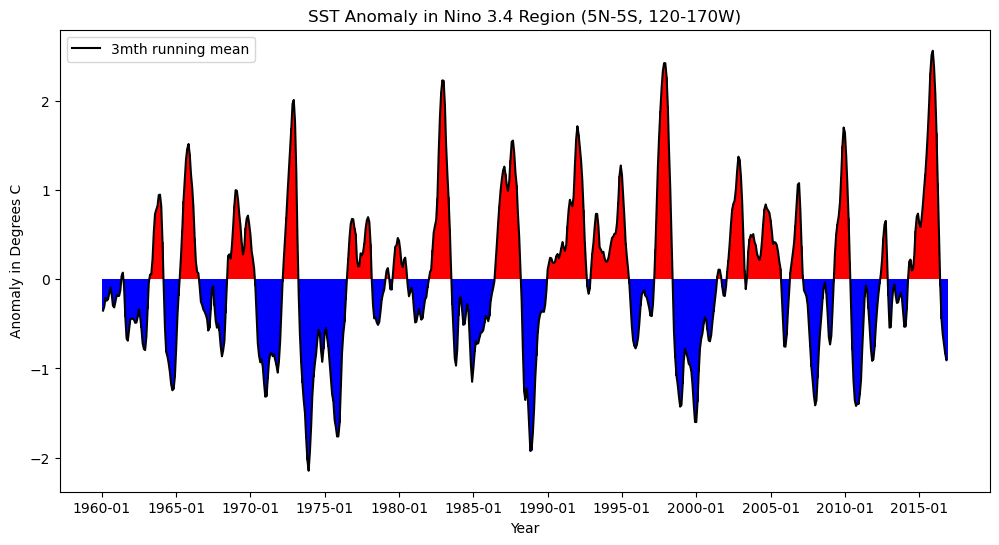

In [94]:
#2.2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import MultipleLocator


# 计算3个月的移动平均值
window_size = 3

monthly_anomalies = anomalies.copy()
moving_avg = np.convolve(monthly_anomalies, np.ones(window_size)/window_size, mode='valid')

# 调整时间数组以匹配移动平均值的长度
# times_mpl = np.array(times[window_size-2:-1])
# times_mpl = dr.time[window_size-2:-1]
times_mpl = mdates.date2num(dr.time.values[window_size-2:-1])

# 绘制Niño 3.4 SST异常值
#绘制趋势线
plt.figure(figsize=(12, 6))
plt.plot(times_mpl, moving_avg, label='3mth running mean', color='black')

# #按照正负值绘制条形图
mask_1 = (moving_avg>=0)
mask_2 = (moving_avg<0)
plt.bar(times_mpl[mask_1], moving_avg[mask_1], color='red', align='center', width=50)
plt.bar(times_mpl[mask_2], moving_avg[mask_2], color='blue', align='center', width=50)


# 设置图表标题和坐标轴标签
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')

# 设置图例
plt.legend()

# 设置网格线
plt.grid(False)

# 设置x轴的日期格式
tick_spacing = 60  # 60个月
ticks = mdates.date2num(dr.time[::tick_spacing].values)  # 生成刻度位置
labels = [mdates.num2date(tick).strftime('%Y-%m') for tick in ticks]  # 格式化刻度标签
plt.xticks(ticks, labels)

plt.show()

In [3]:
#3
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from netCDF4 import Dataset, num2date
from datetime import datetime 

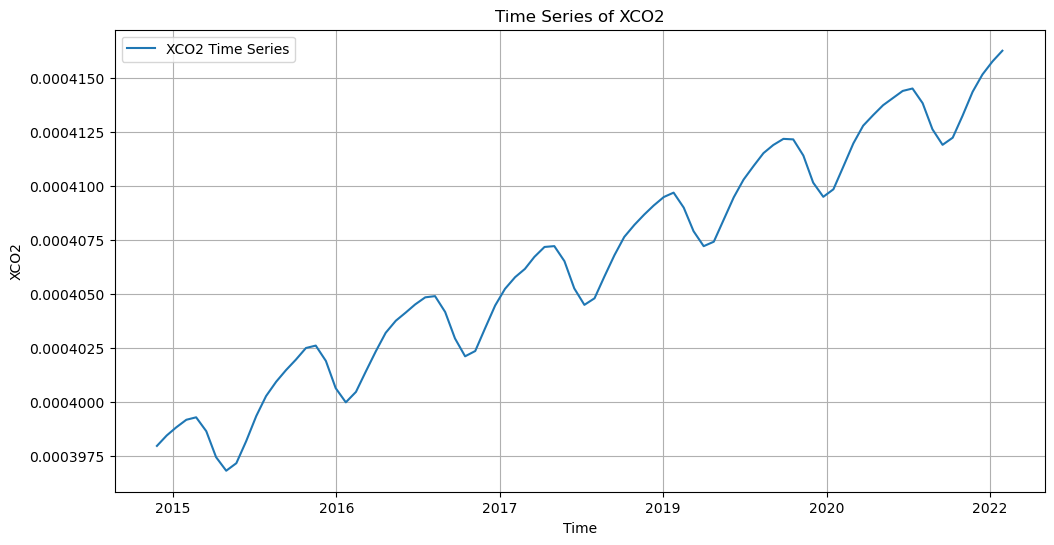

In [5]:
#3.1
# 获取所有.nc文件
directory = r'E:\0_plus_1\home work\python\homework3\output_file'


nc_files = [f for f in os.listdir(directory) if f.endswith('.nc4')]

# 变量名和时间变量名
variable_name = 'XCO2'
time_name = 'time'

# 存储所有文件的数据和时间
all_data = []
all_times = []
all_years = []

# 循环处理每个文件
for file in nc_files:
    file_path = os.path.join(directory, file)
   
    
    # 读取.nc4文件
    with Dataset(file_path, 'r') as nc:
        # 获取时间变量
        time_var = nc.variables[time_name]
        times = num2date(time_var[:], units=time_var.units)
        
        # 获取XCO2变量
        xco2_data = nc.variables[variable_name][:]
        
        # 将数据和时间添加到列表中
        
        if xco2_data.ndim > 1:
            xco2_data = xco2_data.mean(axis=(1, 2))  # 对lat和lon取平均值，根据实际维度调整
        all_times.extend([mdates.date2num(datetime(t.year, t.month, t.day)) for t in times])
        all_data.extend(xco2_data)
        all_years.extend([t.year for t in times])

# 转换为numpy数组
all_times = np.array(all_times)
all_data = np.array(all_data)
all_years = np.array(all_years)

# 按时间排序
sorted_indices = np.argsort(all_times)
all_times = all_times[sorted_indices]
all_data = all_data[sorted_indices]
all_years = all_years[sorted_indices]

# 绘制时间序列图
plt.figure(figsize=(12, 6))
plt.plot(all_times, all_data, label='XCO2 Time Series')

# 格式化x轴日期
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 只显示年份

plt.xlabel('Time')
plt.ylabel('XCO2')
plt.title('Time Series of XCO2')
plt.legend()
plt.grid(True)
plt.show()

图片：二氧化碳的浓度逐年上升

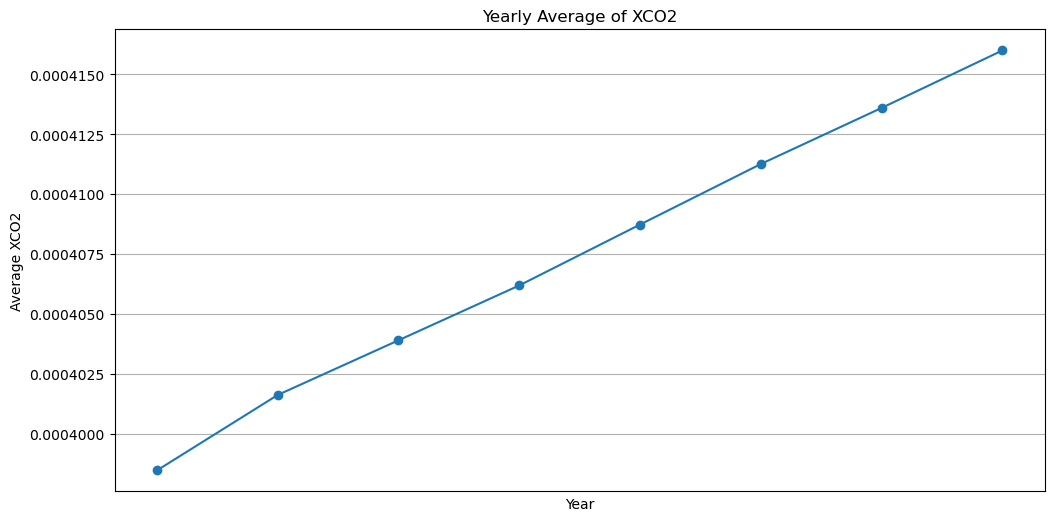

In [251]:
#3.2

### Plot 1: 年度平均值图
unique_years = np.unique(all_years)
yearly_means = [np.mean(all_data[all_years == year]) for year in unique_years]
plt.figure(figsize=(12, 6))
plt.plot(unique_years, yearly_means, marker='o', linestyle='-')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Year')
plt.ylabel('Average XCO2')
plt.title('Yearly Average of XCO2')
plt.grid(True)
plt.show()




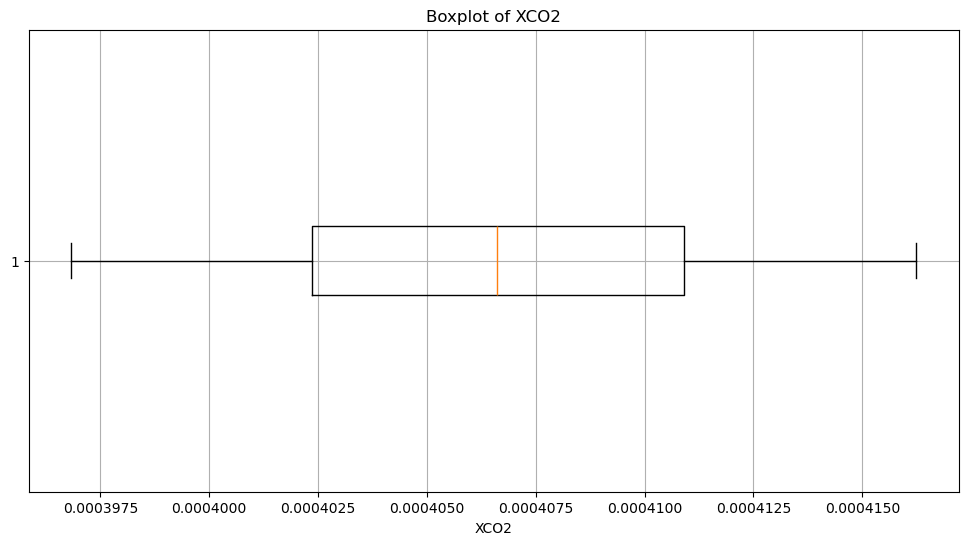

In [253]:
### Plot 2: 箱型图
plt.figure(figsize=(12, 6))
plt.boxplot(all_data, vert=False)
plt.title('Boxplot of XCO2')
plt.xlabel('XCO2')
plt.grid(True)
plt.show()

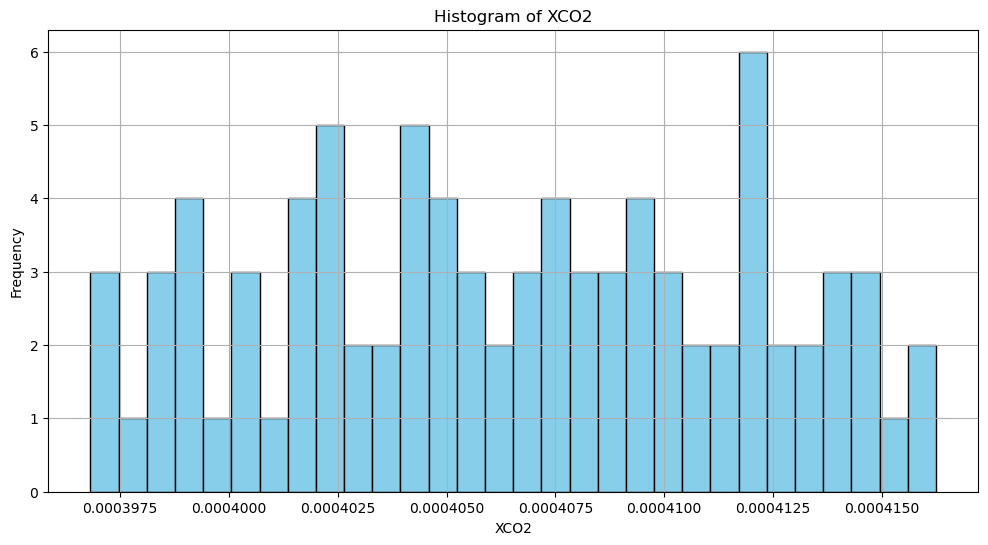

In [255]:
### Plot 3: 直方图
plt.figure(figsize=(12, 6))
plt.hist(all_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of XCO2')
plt.xlabel('XCO2')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
###Plot 4：hvplot绘制散点图 
import hvplot.xarray
import pandas as pd
import hvplot.pandas
# 将数据转换为Pandas DataFrame
df = pd.DataFrame({
    'Time': [mdates.num2date(t) for t in all_times],  # 将时间戳转换回日期
    'XCO2': all_data,
    'Year': all_years
})

# 使用hvplot绘制散点图
df.hvplot.scatter(x='Time', y='XCO2', c='XCO2', cmap='turbo', title='Scatter Plot of XCO2')



:Scatter   [Time]   (XCO2)

In [8]:
###Plot 5：hvplot绘制2015-01-16的xco2的分布图
import os
import numpy as np
import xarray as xr
import hvplot.xarray
import hvplot.pandas

# 读取第一个文件以获取纬度和经度信息
file_path = os.path.join(directory, nc_files[0])
ds = xr.open_dataset(file_path)

# 获取纬度和经度信息
lat = ds['lat'].values
lon = ds['lon'].values


# 使用 hvplot 绘制数据图
ds.XCO2.hvplot(groupby="time", clim=(ds.XCO2.min(), ds.XCO2.max()), cmap='turbo')

:DynamicMap   [time]
   :Image   [lon,lat]   (Assimilated dry-air column average CO2 daily mean)